# <span style="color:darkblue"> QTM 151 - Quiz 5 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your Emory ID below

In [95]:
# Write your answer here
ID = 2512750
print (ID)

2512750


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


**By printing the message, you acknowledge that you will abide by Emory's code of conduct.**


In [96]:
# Write your answer here:
print ("I will abide by Emory's code of conduct")

I will abide by Emory's code of conduct


<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [97]:
# Write your answer here
import pandas as pd
import matplotlib.pyplot as plt

<font size = "5">

In this quiz you will work with data on exchange rates, <br>
for the following currencies:

- 1 euro (EUR) to dollar (USD)
- 1 pound (GPB) to dollar (USD).


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "currencies.csv"
- Parse the "date_string" column with ```pd.to_datetime()```
- To get full points, set the "format" option using wildcards as in Lecture 20.


In [98]:
# Write your own code
currencies = pd.read_csv("data_raw/currencies.csv")
currencies["date_string"] = pd.to_datetime(currencies["date_string"]).dt.strftime('%A, %B %d, %Y')
print (currencies)

                      date_string  eur_to_usd  gbp_to_usd
0        Monday, January 04, 1999      1.6581      1.1812
1       Tuesday, January 05, 1999      1.6566      1.1760
2     Wednesday, January 06, 1999      1.6547      1.1636
3      Thursday, January 07, 1999      1.6495      1.1672
4        Friday, January 08, 1999      1.6405      1.1554
...                           ...         ...         ...
6320       Monday, March 27, 2023      1.2278      1.0789
6321      Tuesday, March 28, 2023      1.2341      1.0844
6322    Wednesday, March 29, 2023      1.2313      1.0826
6323     Thursday, March 30, 2023      1.2368      1.0899
6324       Friday, March 31, 2023      1.2369      1.0872

[6325 rows x 3 columns]


<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "gbp_to_usd" and "eur_to_usd" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 Euro to USD" and "1 GPB to USD"

Hint: See Lecture 21 for how to plot multiple columns <br>
Hint: Remember to include the legend names as a list ```[...]```


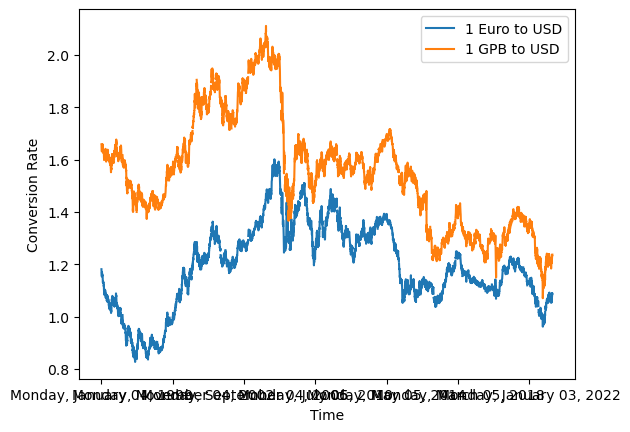

In [99]:
# Write your own code

currencies[["date_string","gbp_to_usd","eur_to_usd"]].set_index("date_string").plot()
plt.xlabel("Time")
plt.ylabel("Conversion Rate")
plt.legend(["1 Euro to USD","1 GPB to USD"])

<font size = "5">

(c) Compute growth rates

<font size = "3">

- Calculate a new column "growth_euro" which computes the percentage daily <br>
growth rate of "eur_to_usd".

Hint: Use ```.diff()``` and ```.shift(1)``` as in Lecture 21

In [100]:
# Write your own code

currencies["diff_growth_euro"] = currencies["eur_to_usd"].diff()
currencies["lag_growth_euro"] = currencies["eur_to_usd"].shift(1)
currencies["growth_euro"] = (currencies["diff_growth_euro"]/currencies["lag_growth_euro"])* 100

<font size = "5">

(d) Flag subset of data and plot

<font size = "3">

- Create a boolean colum (True/False) "bool_cond" which checks whether <br>
"growth_euro" had a value greater than 2 or less than -2
- Generate a line plot with the "growth_euro" series, label the axes and the title
- Use the command ```plt.fill_between()``` as in Lecture 21 to create a shaded region <br>
for time periods where "bool_cond" is true.



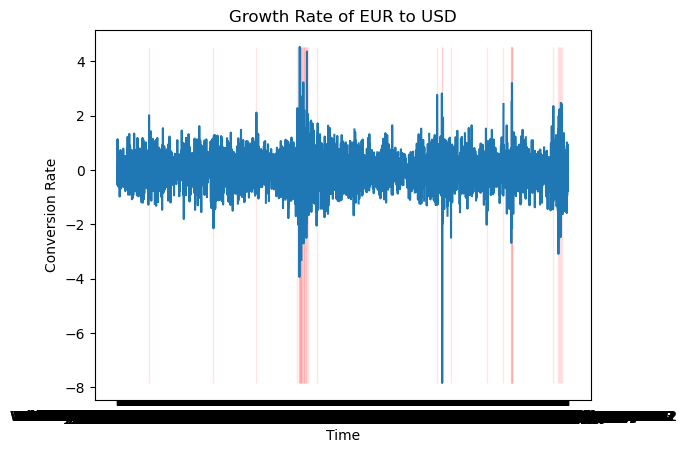

In [106]:
# Write your own code

currencies["bool_cond"]  = (currencies["growth_euro"] > 2) | (currencies["growth_euro"] < -2)

plt.plot("date_string", "growth_euro", data = currencies)
plt.xlabel("Time")
plt.ylabel("Conversion Rate")
plt.title("Growth Rate of EUR to USD")

vec_y = currencies["growth_euro"]
plt.fill_between(x= currencies["date_string"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = currencies["bool_cond"],
                 alpha = 0.1,color = "red")

plt.show()


<font size = "5">

(e) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the column "date" and freq to "m" (month)
- Follow the instructions in Lecture 20 to compute an aggregate dataset <br>
by month which computes the standard deviation of "eur_to_usd"
- Display the dataset




In [123]:
# Write your own code

month_config = pd.Grouper(key='date_string', freq='m')
currencies.groupby(month_config).agg(eur_sd = ("eur_to_usd","std")).reset_index()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

<font size = "5">

(f) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["eur_to_usd","gbp_to_usd"]
```

- Display the dataset

Hint: See Lecture 21 for details on ```pd.melt()```

In [117]:
# Write your own code

currencies_long = pd.melt(currencies,
                         var_name = "type",
                         value_name = "exchange_rate",
                         id_vars='date_string',
                         value_vars=['eur_to_usd','gbp_to_usd'])

display(currencies_long)

,date_string,type,exchange_rate
0,"Monday, January 04, 1999",eur_to_usd,1.6581
1,"Tuesday, January 05, 1999",eur_to_usd,1.6566
2,"Wednesday, January 06, 1999",eur_to_usd,1.6547
3,"Thursday, January 07, 1999",eur_to_usd,1.6495
4,"Friday, January 08, 1999",eur_to_usd,1.6405
...,...,...,...
12645,"Monday, March 27, 2023",gbp_to_usd,1.0789
12646,"Tuesday, March 28, 2023",gbp_to_usd,1.0844
12647,"Wednesday, March 29, 2023",gbp_to_usd,1.0826
12648,"Thursday, March 30, 2023",gbp_to_usd,1.0899
